In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexStew/'

In [3]:
final_df=pd.read_csv('ComplexStew_MS_PerStep.csv')

In [4]:
filtered_beef = final_df[final_df['Step'].str.strip() == 'Add Beef']
filtered_beef = filtered_beef[~filtered_beef['Participant'].isin(['C010', 'C022', 'C030'])]
filtered_beef
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
0,C002,28,Add Beef,540.634569,871.385365,616.627310,551.960792,870.054407,3283.678374,2454.728468,1567.848626
10,C004,30,Add Beef,678.021052,1056.024777,1333.029026,1224.846997,1953.444900,1969.429199,1167.451003,1245.300403
20,C005,46,Add Beef,527.974440,676.804793,1141.001602,798.177675,1330.338188,1761.635707,1366.876046,1110.322250
32,C011,34,Add Beef,757.515406,902.667677,998.559476,844.998041,907.629452,3065.018582,1924.378370,1372.717540
47,C015,33,Add Beef,1309.921467,1754.988121,1829.264137,1805.224913,1682.359192,4344.701474,3481.695626,2629.277680
57,C018,50,Add Beef,507.964028,846.421903,512.605757,566.642162,606.725382,2240.851043,1523.371874,1162.647533
67,C019,40,Add Beef,407.425461,587.880202,397.311728,398.836634,1416.035533,1755.487755,1277.206584,860.739231
81,C023,52,Add Beef,1575.045027,1575.630306,1833.642797,1666.449108,2334.444410,4672.175111,3326.770177,2456.115983
91,C026,33,Add Beef,306.848860,564.804134,302.741243,384.603963,226.258566,1788.584405,1507.303911,1016.467496
101,C027,41,Add Beef,506.024903,557.296842,680.568540,661.776561,608.798586,2185.573133,1641.029995,1203.192888


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_beef = filtered_beef.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_beef.select_dtypes(include=['float64', 'int64']).columns
filtered_beef[numerical_cols] = filtered_beef[numerical_cols].replace(0, np.nan)

filtered_beef[numerical_cols] = imputer.fit_transform(filtered_beef[numerical_cols])
filtered_beef

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
0,C002,28.0,Add Beef,540.634569,871.385365,616.627310,551.960792,870.054407,3283.678374,2454.728468,1567.848626
10,C004,30.0,Add Beef,678.021052,1056.024777,1333.029026,1224.846997,1953.444900,1969.429199,1167.451003,1245.300403
20,C005,46.0,Add Beef,527.974440,676.804793,1141.001602,798.177675,1330.338188,1761.635707,1366.876046,1110.322250
32,C011,34.0,Add Beef,757.515406,902.667677,998.559476,844.998041,907.629452,3065.018582,1924.378370,1372.717540
47,C015,33.0,Add Beef,1309.921467,1754.988121,1829.264137,1805.224913,1682.359192,4344.701474,3481.695626,2629.277680
57,C018,50.0,Add Beef,507.964028,846.421903,512.605757,566.642162,606.725382,2240.851043,1523.371874,1162.647533
67,C019,40.0,Add Beef,407.425461,587.880202,397.311728,398.836634,1416.035533,1755.487755,1277.206584,860.739231
81,C023,52.0,Add Beef,1575.045027,1575.630306,1833.642797,1666.449108,2334.444410,4672.175111,3326.770177,2456.115983
91,C026,33.0,Add Beef,306.848860,564.804134,302.741243,384.603963,226.258566,1788.584405,1507.303911,1016.467496
101,C027,41.0,Add Beef,506.024903,557.296842,680.568540,661.776561,608.798586,2185.573133,1641.029995,1203.192888


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Beef',
    'HeadCamera Distance': 'HeadCamera Distance - Add Beef',
    'LeftElbow Distance': 'LeftElbow Distance - Add Beef',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Beef',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Beef',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Beef',
    'RightElbow Distance': 'RightElbow Distance - Add Beef',
    'RightShoulder Distance': 'RightShoulder Distance - Add Beef'
}

# Rename columns
filtered_beef = filtered_beef.rename(columns=new_column_names)
filtered_beef

,Participant,Block Design Raw Score,Step,Chest Distance - Add Beef,HeadCamera Distance - Add Beef,LeftElbow Distance - Add Beef,LeftShoulder Distance - Add Beef,MotionControllerLeft Distance - Add Beef,MotionControllerRight Distance - Add Beef,RightElbow Distance - Add Beef,RightShoulder Distance - Add Beef
0,C002,28.0,Add Beef,540.634569,871.385365,616.627310,551.960792,870.054407,3283.678374,2454.728468,1567.848626
10,C004,30.0,Add Beef,678.021052,1056.024777,1333.029026,1224.846997,1953.444900,1969.429199,1167.451003,1245.300403
20,C005,46.0,Add Beef,527.974440,676.804793,1141.001602,798.177675,1330.338188,1761.635707,1366.876046,1110.322250
32,C011,34.0,Add Beef,757.515406,902.667677,998.559476,844.998041,907.629452,3065.018582,1924.378370,1372.717540
47,C015,33.0,Add Beef,1309.921467,1754.988121,1829.264137,1805.224913,1682.359192,4344.701474,3481.695626,2629.277680
57,C018,50.0,Add Beef,507.964028,846.421903,512.605757,566.642162,606.725382,2240.851043,1523.371874,1162.647533
67,C019,40.0,Add Beef,407.425461,587.880202,397.311728,398.836634,1416.035533,1755.487755,1277.206584,860.739231
81,C023,52.0,Add Beef,1575.045027,1575.630306,1833.642797,1666.449108,2334.444410,4672.175111,3326.770177,2456.115983
91,C026,33.0,Add Beef,306.848860,564.804134,302.741243,384.603963,226.258566,1788.584405,1507.303911,1016.467496
101,C027,41.0,Add Beef,506.024903,557.296842,680.568540,661.776561,608.798586,2185.573133,1641.029995,1203.192888


In [7]:
tracker_columns = ['Chest Distance - Add Beef', 'HeadCamera Distance - Add Beef', 'LeftElbow Distance - Add Beef', 'LeftShoulder Distance - Add Beef',
                   'RightElbow Distance - Add Beef', 'RightShoulder Distance - Add Beef', 'MotionControllerLeft Distance - Add Beef',
                   'MotionControllerRight Distance - Add Beef']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_beef, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_beef[block_design_col], filtered_beef[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_beef, tracker_columns, block_design_col)
correlation_df


,Tracker,Correlation,P-value
0,Chest Distance - Add Beef,0.221461,0.512828
1,HeadCamera Distance - Add Beef,0.077449,0.820939
2,LeftElbow Distance - Add Beef,0.287017,0.392136
3,LeftShoulder Distance - Add Beef,0.273349,0.416037
4,RightElbow Distance - Add Beef,0.291573,0.384324
5,RightShoulder Distance - Add Beef,0.118451,0.728688
6,MotionControllerLeft Distance - Add Beef,0.136675,0.688631
7,MotionControllerRight Distance - Add Beef,0.264238,0.432354


In [8]:
#filtered_beef.to_csv('ComplexStew_AddBeef.csv',index=False)

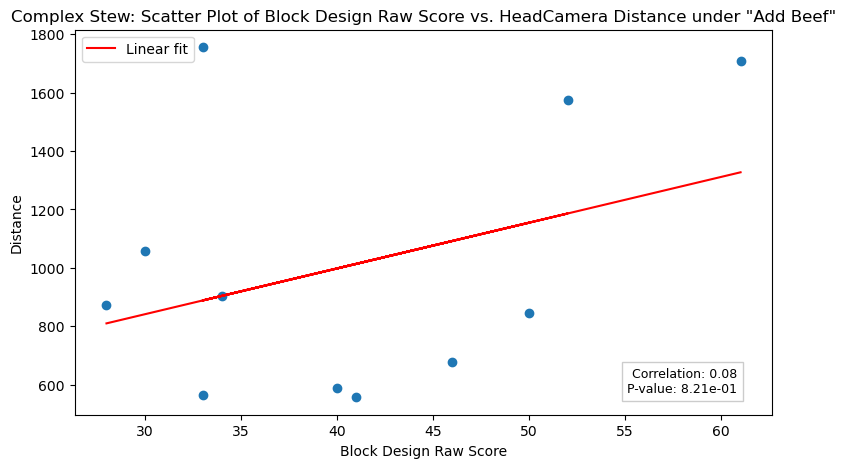

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['HeadCamera Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['HeadCamera Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['HeadCamera Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '17 CS_BeefDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

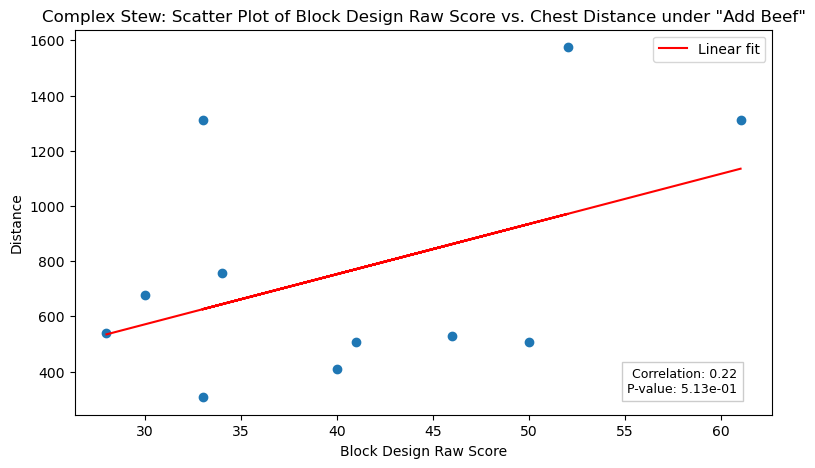

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['Chest Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['Chest Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['Chest Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Chest Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '18 CS_BeefDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

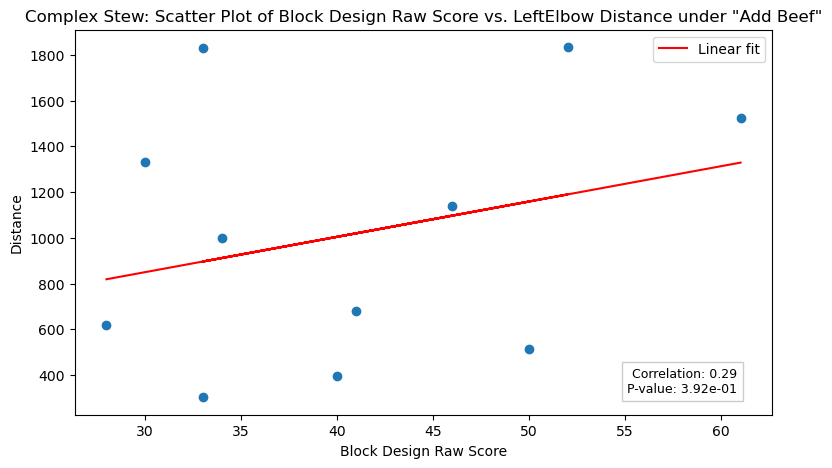

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['LeftElbow Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['LeftElbow Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['LeftElbow Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '19 CS_BeefDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

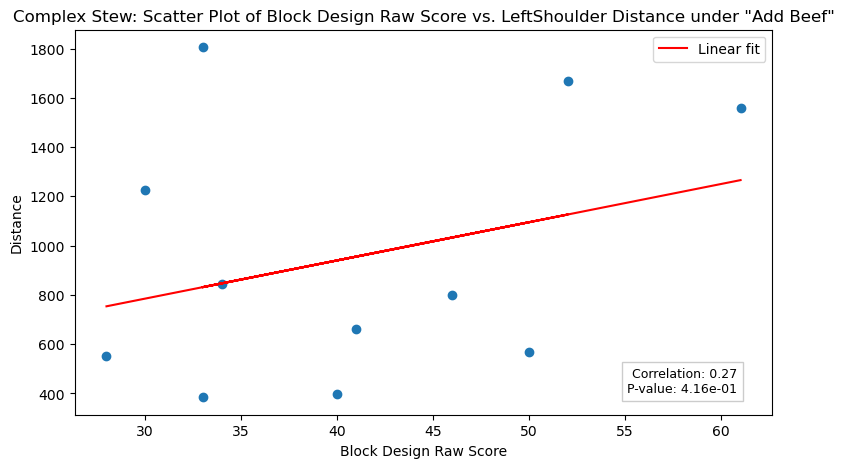

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['LeftShoulder Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['LeftShoulder Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['LeftShoulder Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '20 CS_BeefDistanceLeftShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

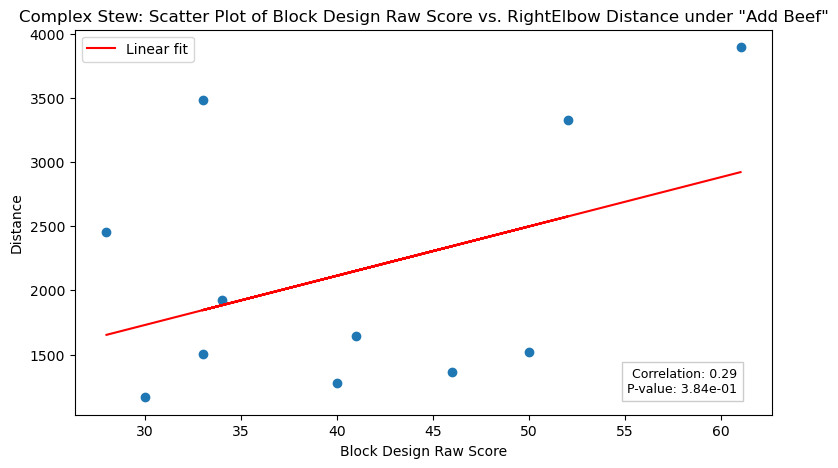

In [13]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['RightElbow Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['RightElbow Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['RightElbow Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '21 CS_BeefDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

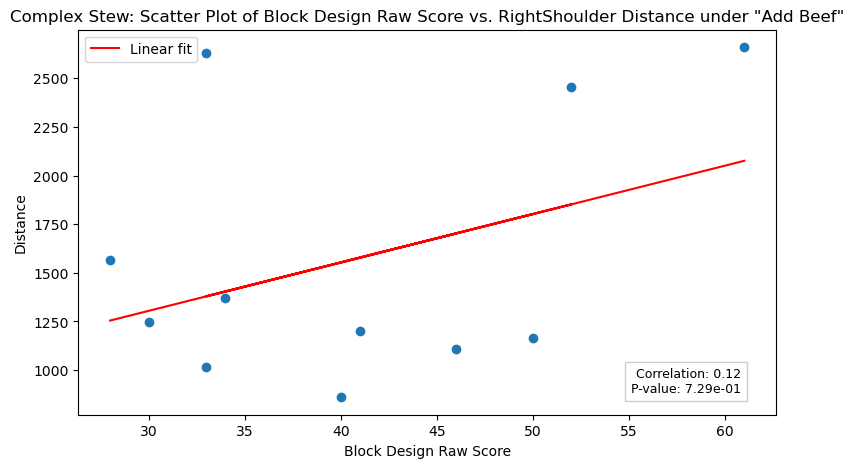

In [14]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['RightShoulder Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['RightShoulder Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['RightShoulder Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '22 CS_BeefDistanceRightShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

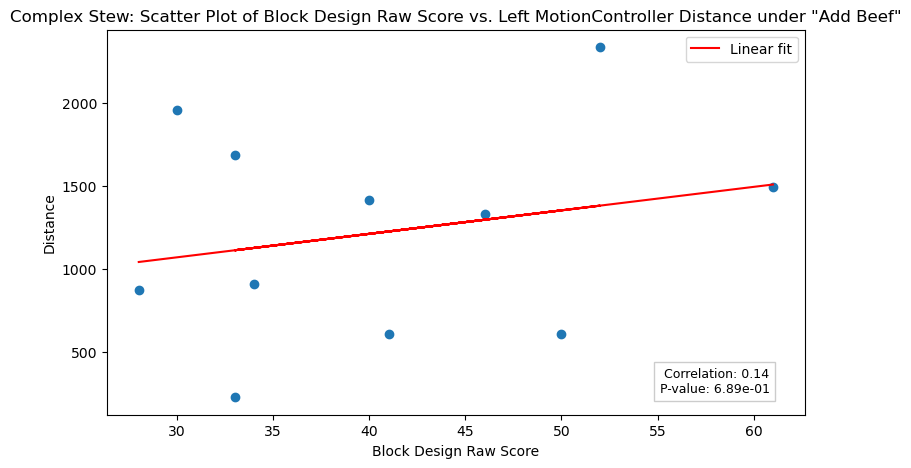

In [17]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerLeft Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerLeft Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerLeft Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '23 CS_BeefDistanceLeftContrlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

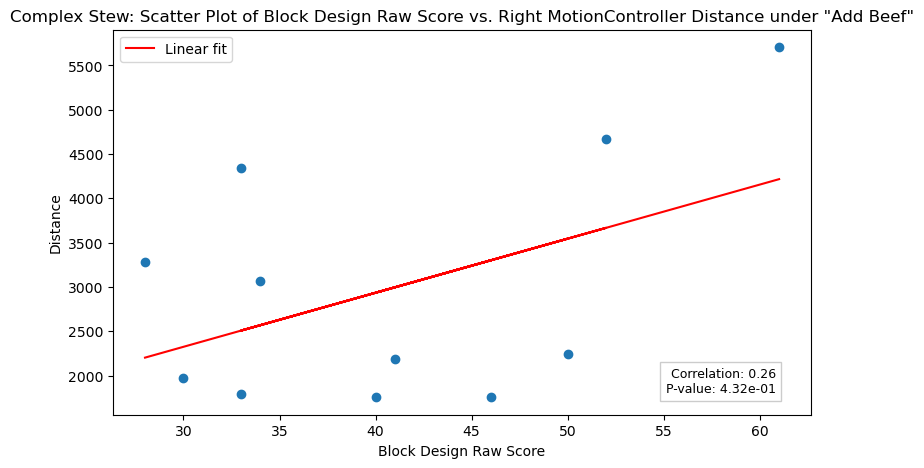

In [16]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerRight Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerRight Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerRight Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '24 CS_BeefDistanceRightContrlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()